In [1]:

#imporitng the required packages
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
## REading the data
telecom_df= pd.read_csv('telecom_churn_data.csv')

In [3]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_df.shape

(99999, 226)

In [5]:
##Checking the column names
telecom_df.columns


Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [6]:
#Checking the datatypes
telecom_df.dtypes


mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [7]:
#Checking the Null values
telecom_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [8]:
# Filter the DataFrame to show only columns with null values
null_columns = telecom_df.columns[telecom_df.isnull().any()]
telecom_df[null_columns][telecom_df[null_columns].isnull().any(axis=1)]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.00,NaN,...,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,24.11,78.68,7.68,18.34,...,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,11.54,55.24,37.26,74.81,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,99.91,54.39,310.98,241.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,50.31,149.44,83.89,58.78,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,8/31/2014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,5.40,3.36,5.91,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,29.26,18.13,16.06,49.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,1.11,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [9]:
null_values_df = telecom_df[null_columns][telecom_df[null_columns].isnull().any(axis=1)]
null_values_df.head(10)  # Display the first 10 rows with null values

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.00,NaN,...,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,24.11,78.68,7.68,18.34,...,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,11.54,55.24,37.26,74.81,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,99.91,54.39,310.98,241.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,50.31,149.44,83.89,58.78,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,50.16,43.63,85.48,138.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,71.03,45.03,76.66,15.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,57.84,54.68,52.29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,413.69,351.03,35.08,33.46,...,0.00,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
9,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,33.89,30.11,22.43,27.84,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [10]:
# To get the precentage of null values from all columns
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)),2)


mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [11]:
telecom_df.info(verbose=1)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [12]:

# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
num_cols = [column for column in telecom_df.columns if column not in id_cols + date_cols + cat_cols]

In [13]:
# The number of columns in each list
print("--> ID cols: %d\n--> Date cols:%d\n--> Numeric cols:%d\n--> Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

--> ID cols: 2
--> Date cols:12
--> Numeric cols:204
--> Category cols:8


# DATA CLEANING

In [14]:


# Setting Display Options
pd.set_option('display.max_rows', None)

# Checking Missing Values Percentages
telecom_null_check = 100 * telecom_df.isnull().sum() / len(telecom_df)

# Creating a DataFrame to Display Results
telecom_null_df = pd.DataFrame(telecom_null_check)

# Renaming Columns
telecom_null_df.rename(columns={0: 'Null_Percentage'}, inplace=True)

# Sorting by Null Percentage
telecom_null_df_sorted = telecom_null_df.sort_values('Null_Percentage', ascending=False)

print(telecom_null_df_sorted)

                          Null_Percentage
arpu_3g_6                       74.846748
night_pck_user_6                74.846748
total_rech_data_6               74.846748
arpu_2g_6                       74.846748
max_rech_data_6                 74.846748
fb_user_6                       74.846748
av_rech_amt_data_6              74.846748
date_of_last_rech_data_6        74.846748
count_rech_2g_6                 74.846748
count_rech_3g_6                 74.846748
date_of_last_rech_data_7        74.428744
total_rech_data_7               74.428744
fb_user_7                       74.428744
max_rech_data_7                 74.428744
night_pck_user_7                74.428744
count_rech_2g_7                 74.428744
av_rech_amt_data_7              74.428744
arpu_2g_7                       74.428744
count_rech_3g_7                 74.428744
arpu_3g_7                       74.428744
total_rech_data_9               74.077741
count_rech_3g_9                 74.077741
fb_user_9                       74

There are columns with null values more than 70 % so we can remove columns with more than 70% Null values

In [15]:
   
##Showing Columns with more than 70% Null Value
Missing_Vals_Column_70=list(telecom_null_df_sorted.index[telecom_null_df_sorted['Null_Percentage'] > 70])
(Missing_Vals_Column_70)

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [16]:
##Excluding Max_recharge, total_recharge data and avg recharge amount data for future analysis

In [17]:
# Removing the columns as per above condition
Missing_Vals_Column_70=telecom_df.columns[round(100*telecom_df.isnull().sum()/len(telecom_df),2)> 70]
data_col=['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Missing_Vals_Column_70=[col for col in Missing_Vals_Column_70 if col not in data_col]
telecom_df=telecom_df.drop(Missing_Vals_Column_70,axis=1)
telecom_df.shape

(99999, 198)

In [18]:
# Checking missing values percentages again
def NULL_CHECK(X):
    pd.set_option('display.max_rows', None)
    telecom_null_check_2 = 100*X.isnull().sum()/len(X)
    telecom_df = pd.DataFrame(telecom_null_check_2)
    telecom_df.rename(columns={0:'Null_Percentage'}, inplace=True)
    return telecom_df.sort_values('Null_Percentage', ascending=False)

NULL_CHECK(telecom_df)

,Null_Percentage
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
total_rech_data_6,74.846748
max_rech_data_7,74.428744
total_rech_data_7,74.428744
av_rech_amt_data_7,74.428744
max_rech_data_9,74.077741
total_rech_data_9,74.077741
av_rech_amt_data_9,74.077741
max_rech_data_8,73.660737


In [19]:
# # Convert mobile number to object so that it does not interfare with out visualizations
telecom_df['mobile_number']=telecom_df['mobile_number'].astype('object')
telecom_df['mobile_number'].head()

0    7000842753
1    7001865778
2    7001625959
3    7001204172
4    7000142493
Name: mobile_number, dtype: object

In [20]:
NULL_CHECK(telecom_df)

,Null_Percentage
av_rech_amt_data_6,74.846748
max_rech_data_6,74.846748
total_rech_data_6,74.846748
max_rech_data_7,74.428744
total_rech_data_7,74.428744
av_rech_amt_data_7,74.428744
max_rech_data_9,74.077741
total_rech_data_9,74.077741
av_rech_amt_data_9,74.077741
max_rech_data_8,73.660737


In [21]:
# impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [22]:
# Now impute missing values with 0
telecom_df[zero_impute_rch] = telecom_df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [23]:
print(telecom_df[zero_impute_rch].isnull().sum()*100/telecom_df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [24]:
# Dropping the ID and Date columns as it not needed. 
Dropping=id_cols + date_cols
initial_cols = telecom_df.shape[1]
Cols_to_drop=[col for col in Dropping if col in telecom_df.columns]
telecom_df=telecom_df.drop(Cols_to_drop,axis=1)
telecom_df.shape

(99999, 188)

In [25]:
# Imputing the remaining null columns as 0
telecom_df[telecom_df.select_dtypes(exclude=['datetime64[ns]', 'category']).columns] = telecom_df[telecom_df.select_dtypes(exclude=['datetime64[ns]', 'category']).columns].fillna(0, axis=1)

In [26]:
NULL_CHECK(telecom_df)

,Null_Percentage
loc_og_t2o_mou,0.0
ic_others_8,0.0
spl_ic_mou_7,0.0
spl_ic_mou_8,0.0
spl_ic_mou_9,0.0
isd_ic_mou_6,0.0
isd_ic_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_9,0.0
ic_others_6,0.0


In [27]:
# Checking value_counts for loc_og_t2o_mou , std_og_t2o_mou , loc_ic_t2o_mou columns
print(telecom_df.loc_og_t2o_mou.value_counts(dropna= False))
print(telecom_df.std_og_t2o_mou.value_counts(dropna= False))
print(telecom_df.loc_ic_t2o_mou.value_counts(dropna= False))

0.0    99999
Name: loc_og_t2o_mou, dtype: int64
0.0    99999
Name: std_og_t2o_mou, dtype: int64
0.0    99999
Name: loc_ic_t2o_mou, dtype: int64


In [28]:
# Dropping above 3 columns as these have o and missing values
telecom_df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [29]:
telecom_df.shape

(99999, 185)

In [30]:
## Counting the number unique values present in the columns.
def unique_nan(s):
    return s.nunique(dropna=False).sort_values(ascending=False)
unique_nan(telecom_df)

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8      21886
loc_ic_t2m_mou_9    

In [31]:
# Dropping columns with only 1 unique value
cols = []
for i in telecom_df.columns:
    if telecom_df[i].nunique() ==1:
        cols.append(i)
        
cols

telecom_df = telecom_df.drop(cols,1)
telecom_df.shape

(99999, 177)

In [32]:
NULL_CHECK(telecom_df)

,Null_Percentage
arpu_6,0.0
std_ic_t2t_mou_7,0.0
isd_ic_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_9,0.0
ic_others_6,0.0
ic_others_7,0.0
ic_others_8,0.0
ic_others_9,0.0
total_rech_num_6,0.0


Finally there are no missing values in the data

# DATA PREPARATION

Creating column avg_recharge_6_7 by adding total recharge amount of 6 & 7 month, then take avg of sum.

In [33]:
# Get the index of null vals for both columns and verify if both matches 
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = telecom_df.total_rech_data_6[telecom_df.total_rech_data_6.isna()].index != telecom_df.av_rech_amt_data_6[telecom_df.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = telecom_df.total_rech_data_7[telecom_df.total_rech_data_7.isna()].index != telecom_df.av_rech_amt_data_7[telecom_df.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =telecom_df.total_rech_data_8[telecom_df.total_rech_data_8.isna()].index != telecom_df.av_rech_amt_data_8[telecom_df.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


In [34]:
telecom_df['avg_rech_6_7']=(telecom_df['total_rech_amt_6']+telecom_df['total_rech_amt_7'])/2

Define high value customers as follows

Those who have recharged 70% or above in the first two months

In [35]:
#Finding 70th percentile for the new column
X=telecom_df['avg_rech_6_7'].quantile(0.7)
X

368.5

In [36]:
# filtering only the customers who have recharged more than X i.e are HIGH-VALUE Customers.
telecom_df = telecom_df[telecom_df['avg_rech_6_7'] >= X]
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,...,0.0,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0


Tagging the Churners
Those who have not made any calls and have not used any mobile internet even once in the churn phase.  (Churn=1 and else=0)

In [37]:
# counting the rows having more than 50% missing values.
Missing_rows=telecom_df[(telecom_df.isnull().sum(axis=1)) > (len(telecom_df.columns)//2)]
Missing_rows


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [38]:
telecom_df['Churn']= np.where((telecom_df['total_ic_mou_9']==0) & (telecom_df['total_og_mou_9']==0) & (telecom_df['vol_2g_mb_9']==0) & (telecom_df['vol_3g_mb_9']==0), 1, 0)

In [39]:
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0,0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0,0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0,0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,...,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0,0


In [40]:
telecom_df['Churn'].value_counts()

0    27418
1     2593
Name: Churn, dtype: int64

After tagging churners, let us remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [41]:
columns_9 = [col for col in telecom_df.columns.to_list() if '_9' in col]
print(columns_9)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [42]:
# Deleting the churn month columns
telecom_df = telecom_df.drop(columns_9, axis=1)

In [43]:
# Dropping sep_vbc_3g column
telecom_df = telecom_df.drop('sep_vbc_3g', axis=1)

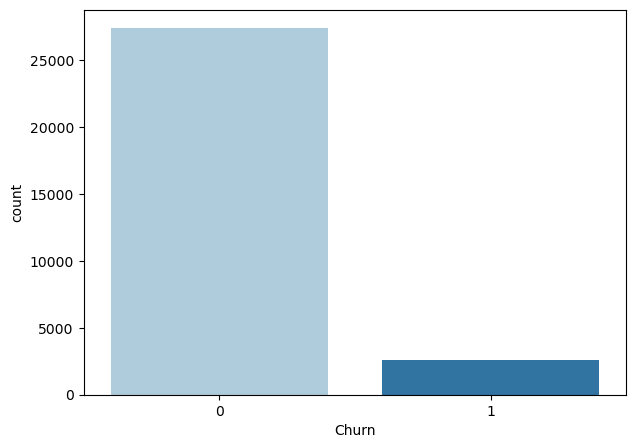

8.64

In [44]:
# Checking churn data
plt.figure(figsize= [7,5])
sns.countplot(telecom_df.Churn, palette= 'Paired', label=[1,0])
plt.show()
# Checking for the CHURN rate
round(100*(telecom_df['Churn'].mean()),2)

This tells us that 8.64% of customers have already churned

# Outlier Treatment

In [45]:
# Converting the Churn column to Object data type in order to proceed with Outlier Treatment.

telecom_df['Churn'] = telecom_df['Churn'].astype(object)

In [46]:
# Listing numeric columns only
num_cols = telecom_df.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [47]:
telecom_df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,...,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,696.664356
std,442.722413,462.897814,492.259586,460.775592,481.780488,466.560947,470.588583,486.525332,477.489377,79.152657,...,0.620418,0.582932,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,488.782088
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,368.500000
1%,18.231900,25.782700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.000000
10%,270.491000,274.341000,134.170000,10.280000,10.040000,2.890000,52.510000,53.580000,19.190000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,396.500000
25%,364.161000,365.004500,289.609500,41.110000,40.950000,27.010000,137.335000,135.680000,95.695000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000
50%,495.682000,493.561000,452.091000,125.830000,125.460000,99.440000,282.190000,281.940000,240.940000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,568.500000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,795.500000
90%,994.099000,995.557000,985.202000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2846.000000,438.970000,454.830000,394.500000,1118.000000


In [48]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols: 
    q1 = telecom_df[col].quantile(0.10)
    q3 = telecom_df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into new_DF
    new_telecom_df = telecom_df.loc[(telecom_df[col] > range_low) & (telecom_df[col] < range_high)]

new_telecom_df.shape

(29700, 135)

# Adding Some New Columns with some insights

In [49]:
# Avg recharge number at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_telecom_df['avg_rech_num_action'] = (new_telecom_df['total_rech_num_7'] + new_telecom_df['total_rech_num_8'])/2
# Difference between total_rech_num_6 and avg_rech_action
new_telecom_df['diff_rech_num'] = new_telecom_df['avg_rech_num_action'] - new_telecom_df['total_rech_num_6']

In [50]:
# Checking if recharge number has decreased in action phase, 1=Yes, 0=No
new_telecom_df['dec_rech_action'] = np.where((new_telecom_df['diff_rech_num'] < 0), 1, 0)

In [51]:
new_telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,802.0,57.74,19.38,18.74,1185.0,1,6.0,1.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,315.0,21.03,910.65,122.16,519.0,0,17.5,-1.5,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,2607.0,0.00,0.00,0.00,380.0,0,7.5,1.5,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,511.0,0.00,2.45,21.89,459.0,0,4.0,-6.0,1
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,667.0,0.00,0.00,0.00,408.0,0,3.0,-16.0,1


Adding dec_rech_amt_action

Indicating if recharge amount of customers when compared to good phase is decreased in action phase or not



In [52]:
# Avg recharge amount in action phase
# We are taking average because there are two months(7 and 8) in action phase
new_telecom_df['avg_rech_amt_action'] = (new_telecom_df['total_rech_amt_7'] + new_telecom_df['total_rech_amt_8'])/2
# Difference of action phase recharge amount and good phase recharge amount
new_telecom_df['diff_rech_amt'] = new_telecom_df['avg_rech_amt_action'] - new_telecom_df['total_rech_amt_6']

In [53]:
# Checking if recharge amount has decreased in action phase, 1=Yes, 0=No
new_telecom_df['dec_rech_amt_action'] = np.where((new_telecom_df['diff_rech_amt'] < 0), 1, 0) 

In [54]:
# average ARUP in action phase
# We are taking average because there are two months(7 and 8) in action phase
new_telecom_df['avg_arpu_action'] = (new_telecom_df['arpu_7'] + new_telecom_df['arpu_8'])/2
# Difference of good and action phase ARPU
new_telecom_df['diff_arpu'] = new_telecom_df['avg_arpu_action'] - new_telecom_df['arpu_6']

In [55]:
# Checking whether the arpu has decreased on the action month, 1=Yes, 0=No
new_telecom_df['dec_avg_revenuePC_action'] = np.where((new_telecom_df['diff_arpu'] < 0), 1, 0)

In [56]:
new_telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,1,6.0,1.0,0,2214.0,634.0,0,2260.6650,1191.4850,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1


In [57]:
# Total mou at good phase incoming and outgoing
new_telecom_df['total_mou_good'] = (new_telecom_df['total_og_mou_6'] + new_telecom_df['total_ic_mou_6'])
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_telecom_df['avg_mou_action'] = (new_telecom_df['total_og_mou_7'] + new_telecom_df['total_og_mou_8'] + new_telecom_df['total_ic_mou_7'] + new_telecom_df['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
new_telecom_df['diff_mou'] = new_telecom_df['avg_mou_action'] - new_telecom_df['total_mou_good']

In [58]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
new_telecom_df['dec_MOU_action'] = np.where((new_telecom_df['diff_mou'] < 0), 1, 0)
new_telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,2214.0,634.0,0,2260.6650,1191.4850,0,1113.99,973.090,-140.900,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,360.5,-76.5,1,314.7925,-63.9285,1,612.22,324.125,-288.095,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,485.0,-22.0,1,399.4655,-93.3805,1,1875.70,1262.390,-613.310,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,254.0,-316.0,1,243.8815,-187.0935,1,711.67,597.705,-113.965,1
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,15.0,-801.0,1,22.2395,-667.7685,1,1341.41,1.560,-1339.850,1


# Exploratory Data Anlaysis

In [59]:
# Converting churn column to int in order to do aggfunc in the pivot table
new_telecom_df['Churn'] = new_telecom_df['Churn'].astype('int64')

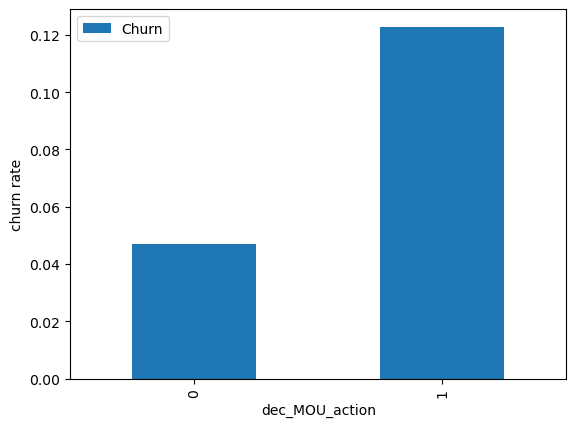

In [60]:
new_telecom_df.pivot_table(values='Churn', index='dec_MOU_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn is more for customers whose minutes of Usase (MOU)  decreased in the action phase than the good phase

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month



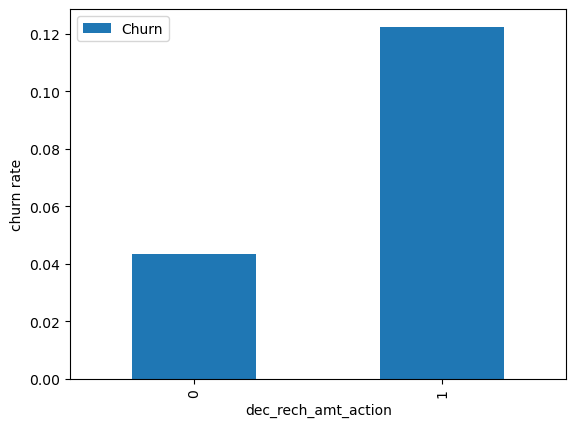

In [61]:
new_telecom_df.pivot_table(values='Churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here also dthe churn rate is high for customer whose amount of recharge is lesser than the amount in the good phase

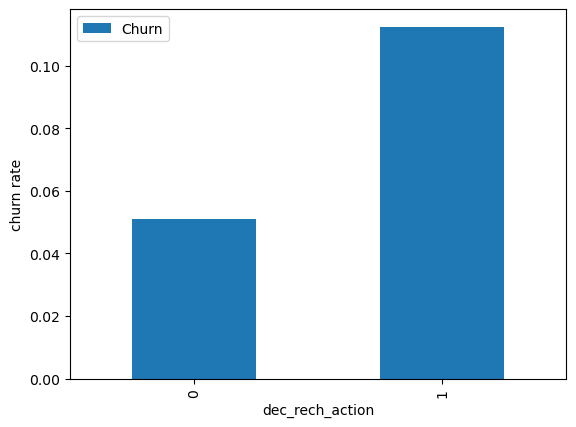

In [62]:
#Churn rate on the basis whether the customer decreased her/his number of recharge in action month
new_telecom_df.pivot_table(values='Churn', index='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The number of recharge is lesser in action phase than in good phase

Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [63]:
# Creating churn dataframe
Data_churn = new_telecom_df[new_telecom_df['Churn'] == 1]
# Creating not churn dataframe
Data_Non_churn = new_telecom_df[new_telecom_df['Churn'] == 0]

 #Distribution plot
ax = sns.distplot(Data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(Data_Non_churn['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

Minutes of usage is higher in churn population which means higher the MOU lesser than churn probability

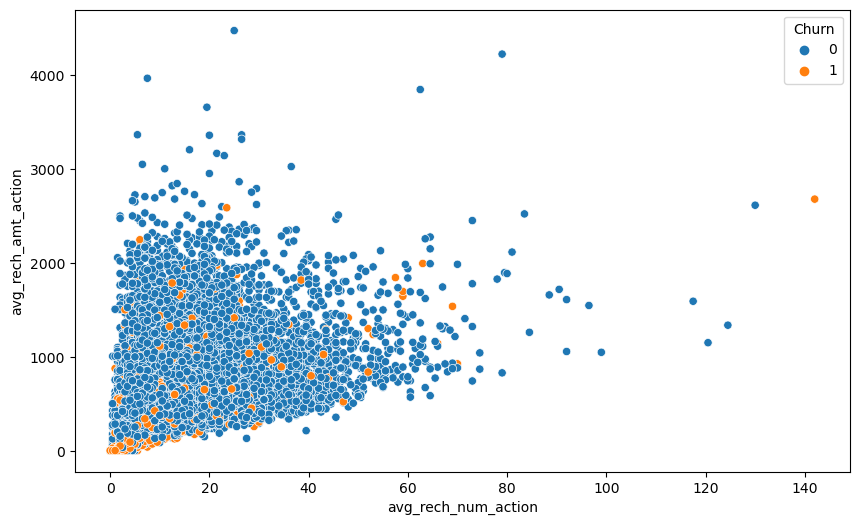

In [64]:
#Analysing recharge amount and number of recharge in action month

plt.figure(figsize=(10,6))
fig = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='Churn', data=new_telecom_df)

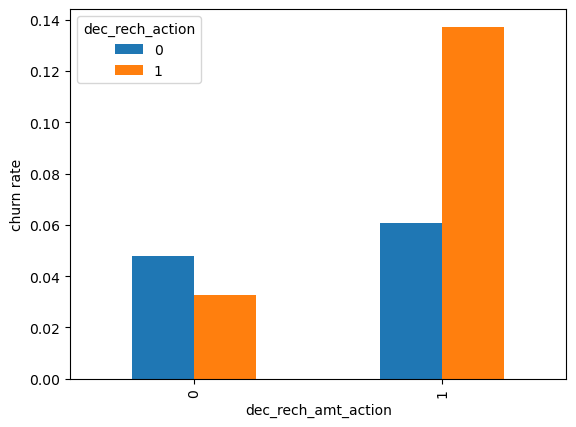

In [65]:
new_telecom_df.pivot_table(values='Churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Decrease in recharge amount higher in the action phase 

In [66]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = new_telecom_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [67]:
recharge_amnt_columns =  new_telecom_df.columns[new_telecom_df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'avg_rech_amt_action',
 'diff_rech_amt',
 'dec_rech_amt_action']

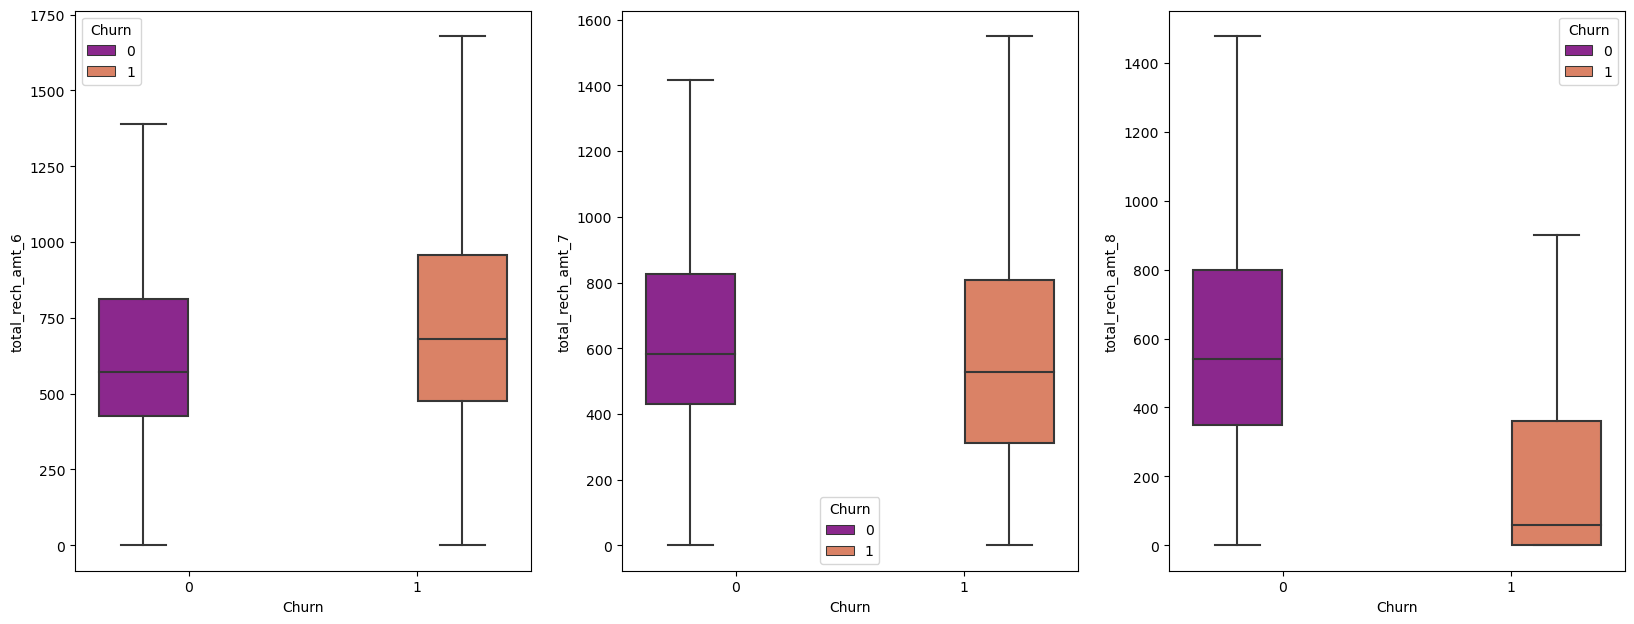

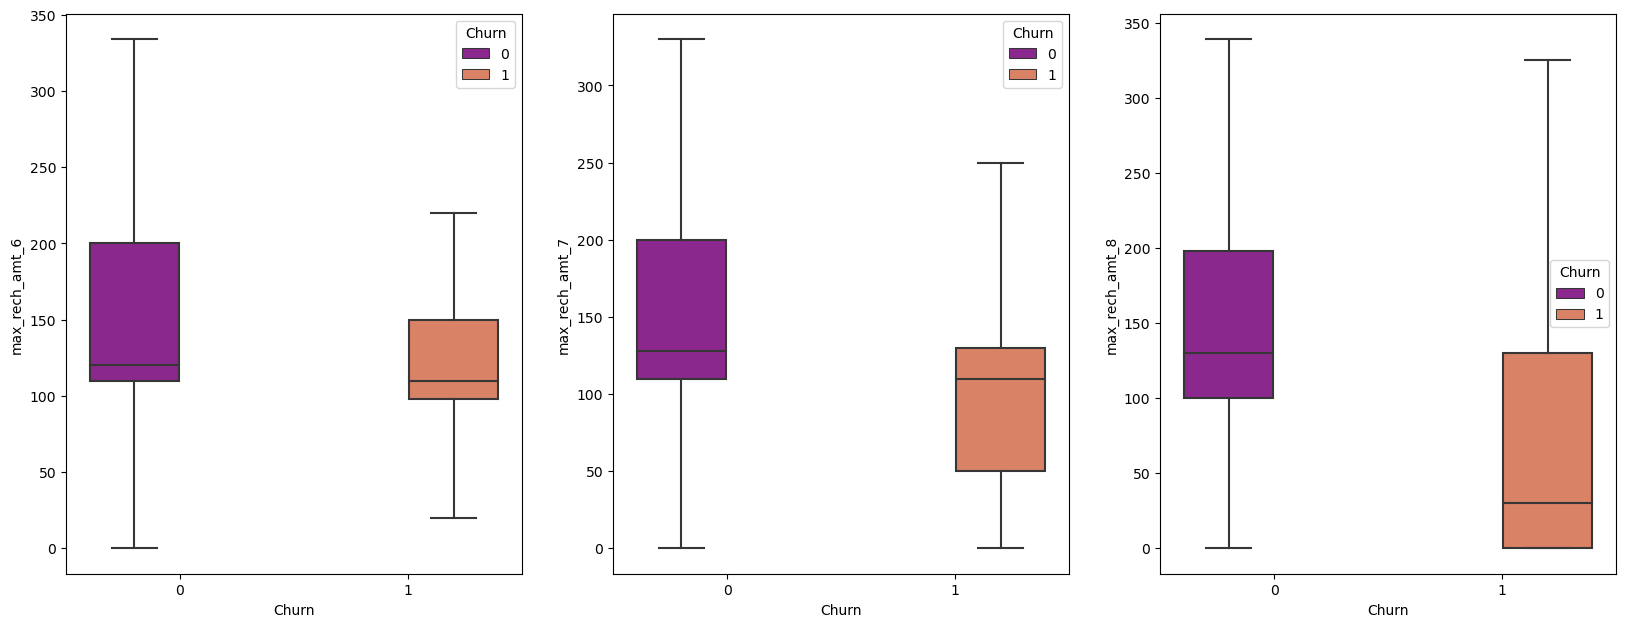

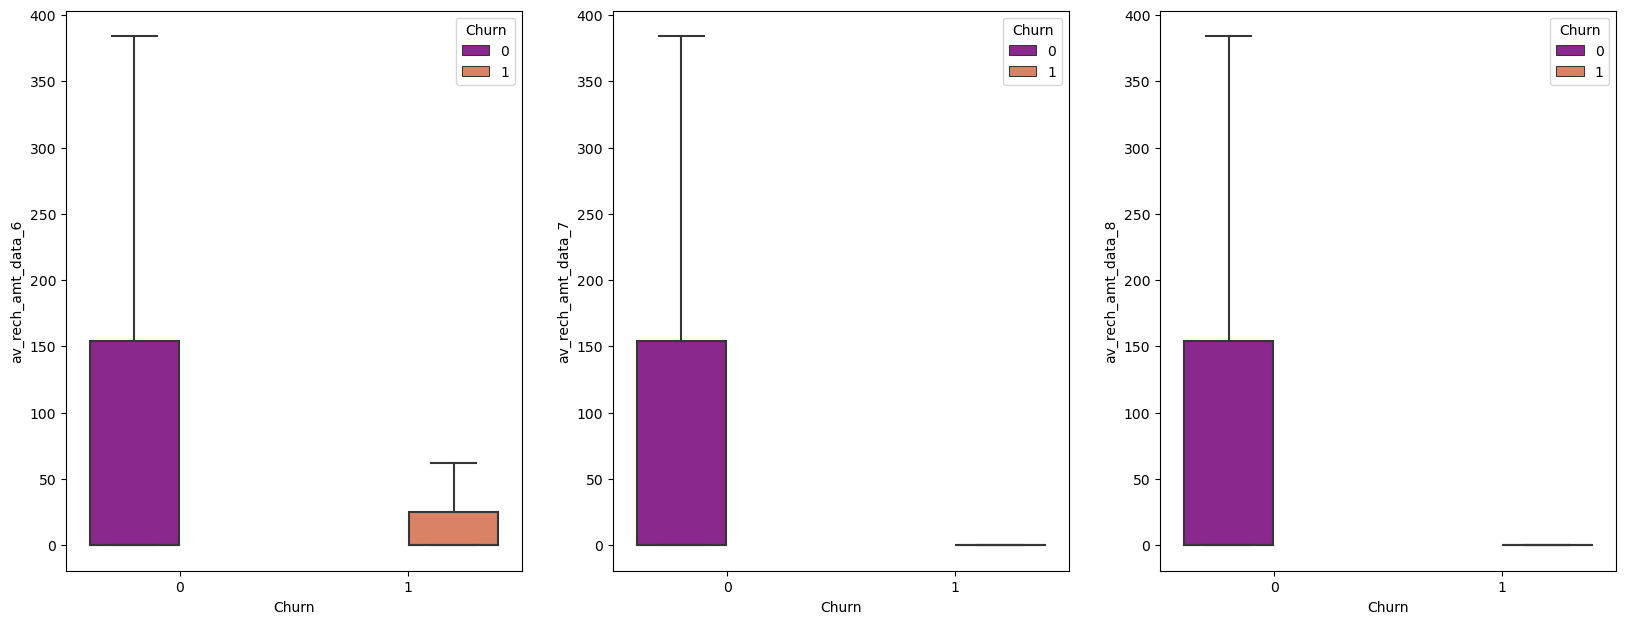

In [68]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

    From the above plots we can see clearly that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.

In [69]:
# Dropping the Some of the Derived columns that are not needed furthur.

new_telecom_df = new_telecom_df.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

In [70]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [71]:
# plotting the distribution for recharge amount columns
col_rech = [col for col in new_telecom_df.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'dec_rech_action',
 'dec_rech_amt_action']

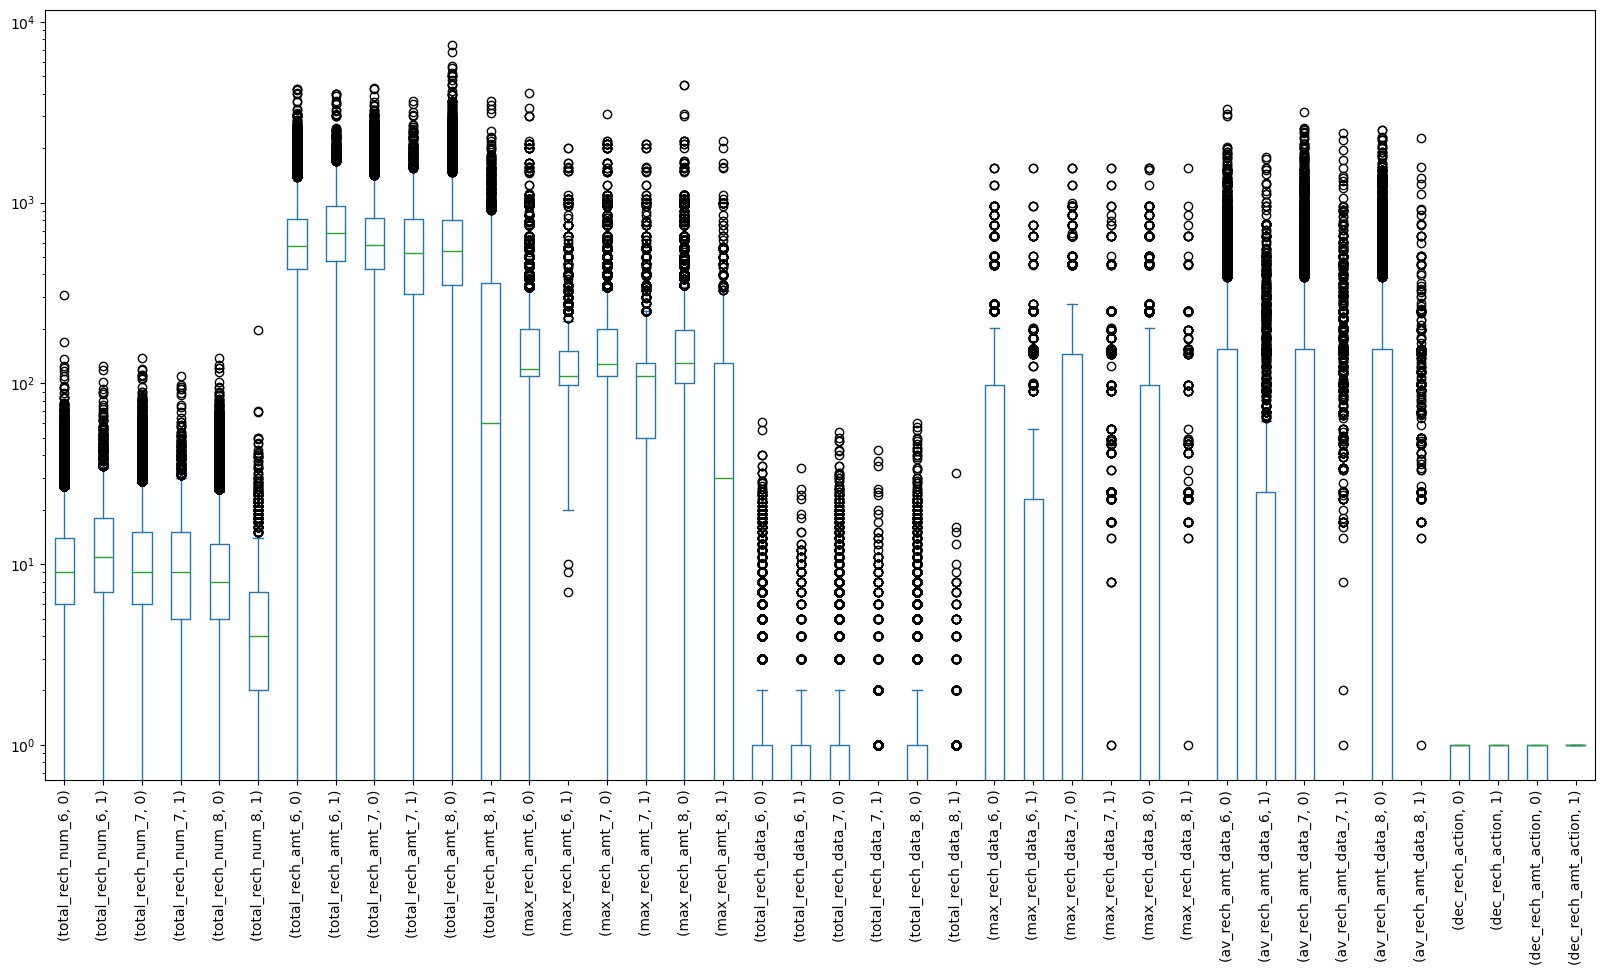

In [72]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

new_telecom_df.pivot(columns='Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')
 

# TRAIN TEST SPLIT

In [73]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = new_telecom_df.drop(['Churn'], axis=1)

# Putting target variable to y
y = new_telecom_df.pop('Churn')

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

In [75]:
print(X_train.columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'dec_rech_action', 'dec_rech_amt_action',
       'dec_avg_revenuePC_action', 'dec_MOU_action'],
      dtype='object', length=137)


In [76]:
# Check if '6/27/2014' exists in any column of the DataFrame
mask = X_train.isin(['6/27/2014'])

# Get the rows where '6/27/2014' exists in any column
rows_with_value = X_train[mask.any(axis=1)]

# Print the rows with the value '6/27/2014'
print(rows_with_value)

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, lo

KeyError: 'date_column'

In [ ]:
#Dealing with Class Imbalance using SMOTE (Synthetic Minority Oversampling Technique)

#We are creating synthetic samples by doing upsampling using SMOTE

# Imporing SMOTE

from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
smt = SMOTE(random_state=42)

# Fittign SMOTE to the train set
X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
!pip install imbalanced-learn

In [80]:
X_train.shape

(20790, 137)

# Scaling numeric features

 During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [81]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [82]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_rech_amt_action,dec_avg_revenuePC_action,dec_MOU_action
20320,1409.374,1052.632,1674.240,453.28,343.38,589.58,826.99,811.99,815.96,70.83,...,0.0,0.0,1791.0,0.00,0.00,0.00,1,1,1,1
43731,388.899,533.338,675.705,13.28,11.94,48.51,201.43,230.93,277.83,0.00,...,0.0,0.0,2372.0,38.22,114.06,236.82,0,0,0,0
90906,19.421,597.255,709.648,3.68,1031.28,1018.29,24.89,927.86,1043.43,0.00,...,0.0,0.0,881.0,0.00,0.00,0.00,0,0,0,0
4169,874.332,925.346,969.886,574.06,363.44,382.78,1131.76,1137.78,1049.96,0.00,...,0.0,0.0,666.0,0.00,0.00,0.00,1,0,0,1
52766,464.520,433.632,422.341,118.33,147.34,176.88,80.99,58.54,22.44,155.34,...,0.0,1.0,228.0,1223.22,875.38,545.07,1,1,1,1


In [83]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))
# Removing the derived binary columns 
binary_cols_to_remove=['dec_MOU_action','dec_rech_action','dec_rech_amt_action','dec_avg_revenuePC_action']
for col in binary_cols_to_remove:
    cols_scale.remove(col)

print("Scalable cols after removing : ", len(cols_scale))

Total scalable columns:  137
Scalable cols after removing :  133


In [84]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_rech_amt_action,dec_avg_revenuePC_action,dec_MOU_action
20320,2.644088,1.531727,3.135535,0.354091,0.092053,0.723688,0.962347,0.890808,0.986646,0.675740,...,-0.156704,-0.139534,0.535511,-0.336804,-0.335377,-0.318228,1,1,1,1
43731,-0.558258,-0.101204,0.434884,-0.634528,-0.625689,-0.483897,-0.472399,-0.404670,-0.193848,-0.217815,...,-0.156704,-0.139534,1.129613,-0.234654,-0.044769,0.329398,0,0,0,0
90906,-1.717715,0.099784,0.526686,-0.656098,1.581720,1.680502,-0.877300,1.149141,1.485647,-0.217815,...,-0.156704,-0.139534,-0.395012,-0.336804,-0.335377,-0.318228,0,0,0,0
4169,0.965076,1.131473,1.230530,0.625467,0.135494,0.262142,1.661349,1.617160,1.499972,-0.217815,...,-0.156704,-0.139534,-0.614861,-0.336804,-0.335377,-0.318228,1,0,0,1
52766,-0.320952,-0.414732,-0.250368,-0.398495,-0.332477,-0.197395,-0.748633,-0.789014,-0.754097,1.741874,...,-0.156704,0.879760,-1.062738,2.932479,1.894963,1.172363,1,1,1,1


In [85]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_rech_amt_action,dec_avg_revenuePC_action,dec_MOU_action
2722,0.239768,0.315156,0.640283,2.275516,2.560561,2.755404,-0.348204,-0.462191,-0.426271,-0.217815,...,-0.156704,-0.139534,-0.826529,-0.336804,-0.335377,-0.318228,0,0,0,0
28720,-0.882470,-0.659766,0.485903,-0.603117,-0.500868,-0.359293,-0.531458,-0.454142,-0.347934,-0.217815,...,7.576476,3.937641,1.515115,0.975672,-0.166073,-0.318228,0,0,0,0
43175,0.545638,-0.023887,0.166142,2.052897,2.239824,2.184877,-0.680423,-0.636092,-0.543305,-0.217815,...,-0.156704,-0.139534,0.300324,-0.336804,-0.335377,-0.318228,1,1,1,0
50024,3.890178,0.911939,-1.392638,-0.606667,-0.558948,-0.592163,9.309385,3.354526,-0.803324,-0.217815,...,-0.156704,-0.139534,-1.024904,-0.336804,-0.118682,2.500240,1,1,1,1
37809,-0.239811,0.829373,0.860839,-0.414942,-0.313918,0.199785,-0.605195,-0.339122,0.255860,-0.193215,...,-0.156704,-0.139534,-0.991160,-0.336804,-0.335377,-0.318228,0,0,0,0


# Model building with PCA(Principal Component Analysis)

In [86]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [87]:
# Looking at the Principal components
pca.components_

array([[ 6.12072625e-02,  6.98308150e-02,  8.49976079e-02, ...,
        -1.05540764e-02, -9.35987104e-03, -6.84471898e-03],
       [ 1.16828199e-01,  1.49269283e-01,  1.45716609e-01, ...,
        -1.52207060e-02, -1.44030050e-02, -1.19810393e-02],
       [ 1.12558134e-01,  1.66501066e-01,  1.58336434e-01, ...,
        -2.11722422e-02, -1.89461055e-02, -1.99618758e-02],
       ...,
       [-9.23475742e-16, -2.46671496e-16,  3.53512081e-16, ...,
         2.33486822e-16, -1.78618677e-16, -1.60968794e-16],
       [ 0.00000000e+00,  2.65490259e-16,  4.27744718e-17, ...,
         2.74841427e-16,  1.10261905e-15,  2.64429943e-16],
       [-0.00000000e+00,  9.14649344e-17,  1.79240879e-16, ...,
        -3.34996493e-17,  4.95834440e-16,  1.29443633e-17]])

In [88]:
# Cumuliative varinace of the principal components.
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[  9.6643  18.4144  25.2592  29.7934  34.173   37.7111  40.6681  43.4119
  45.9114  48.3098  50.5329  52.7008  54.7922  56.847   58.7085  60.4495
  62.0346  63.5165  64.8692  66.1872  67.4557  68.6673  69.8084  70.9384
  72.0649  73.0442  73.9941  74.9165  75.8112  76.6548  77.4718  78.2419
  78.9744  79.6814  80.3764  81.0533  81.7254  82.3811  83.0049  83.6198
  84.2146  84.7948  85.3401  85.8781  86.4027  86.9071  87.3656  87.8068
  88.2072  88.602   88.9764  89.3445  89.7087  90.0712  90.4253  90.7721
  91.1048  91.4344  91.7603  92.0809  92.3904  92.6934  92.9728  93.2473
  93.5111  93.7726  94.0302  94.2842  94.5368  94.7712  94.9999  95.2215
  95.4422  95.658   95.8655  96.0693  96.2667  96.4621  96.6507  96.8371
  97.0167  97.1946  97.3651  97.5333  97.6934  97.8511  98.0069  98.1604
  98.3053  98.4446  98.5727  98.6986  98.8197  98.9356  99.0466  99.1451
  99.2361  99.324   99.4115  99.4963  99.5759  99.6446  99.7124  99.7723
  99.828   99.8676  99.9059  99.9413  99.9707  99.9

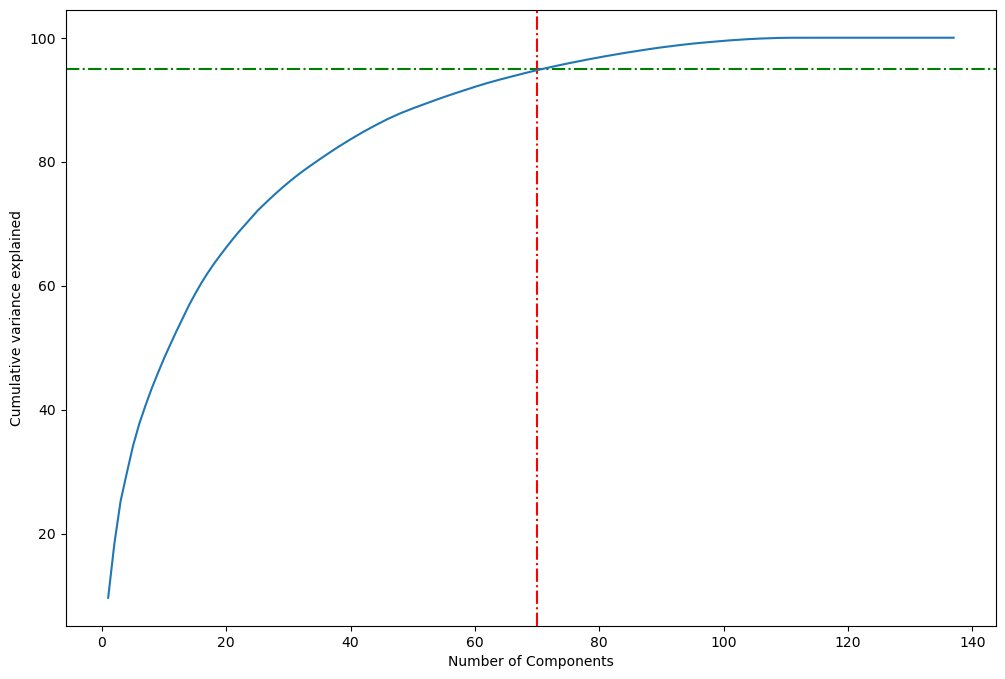

In [89]:
# # Plotting scree plot
fig = plt.figure(figsize=[12,8])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative variance explained")
plt.show()

This shows that 70% of components are enough to make predictions

Using incremental PCA for better efficiency

In [90]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [91]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (20790, 137)
Size of dataset after PCA is: (20790, 70)


In [92]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.014 , min negative corr:  -0.016


In [93]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (20790, 137)
Size of dataset after PCA is: (20790, 70)


In [94]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.014 , min negative corr:  -0.016


In [95]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8910, 70)

# MODEL BUILDING

1. Logistic regression with PCA

In [96]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [97]:
#prediction on test data
y_pred = logreg.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6640 1503]
 [ 128  639]]
sensitivity 	 0.83
specificity 	 0.82
area under the curve 	 0.82


In [98]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [99]:
# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [100]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.138875,0.021732,0.007026,0.007465,0.01,{'C': 0.01},0.887088,0.892632,0.892912,0.876672,...,0.888043,0.006053,6,0.893086,0.891942,0.892623,0.895745,0.894390,0.893557,0.001355
1,0.239666,0.011921,0.008063,0.006301,0.1,{'C': 0.1},0.888946,0.893462,0.893529,0.878198,...,0.889125,0.005714,5,0.895101,0.893969,0.894643,0.897621,0.896547,0.895576,0.001327
2,0.217522,0.025316,0.004692,0.004681,1,{'C': 1},0.889085,0.893358,0.893695,0.878556,...,0.889260,0.005596,1,0.895399,0.894259,0.894909,0.897830,0.896822,0.895844,0.001303
3,0.232132,0.024529,0.005957,0.007348,10,{'C': 10},0.889076,0.893154,0.893706,0.878677,...,0.889254,0.005527,4,0.895436,0.894317,0.894949,0.897833,0.896848,0.895877,0.001285
4,0.265847,0.034399,0.005901,0.004115,100,{'C': 100},0.889072,0.893120,0.893718,0.878698,...,0.889257,0.005517,3,0.895433,0.894323,0.894954,0.897825,0.896852,0.895877,0.001281
5,0.223608,0.016606,0.000000,0.000000,1000,{'C': 1000},0.889075,0.893111,0.893717,0.878706,...,0.889258,0.005513,2,0.895433,0.894323,0.894955,0.897824,0.896851,0.895877,0.001281


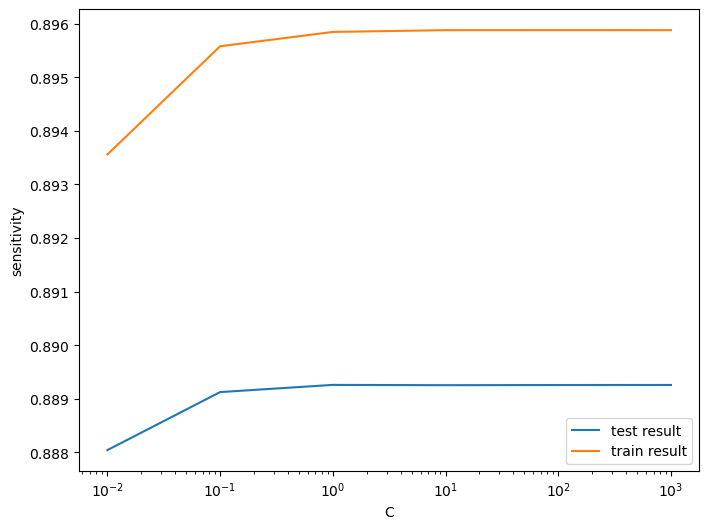

In [101]:
# plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [102]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8892599161960091 at C = 1


# MODEL WITH OPTIMUM Paramaters

In [103]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

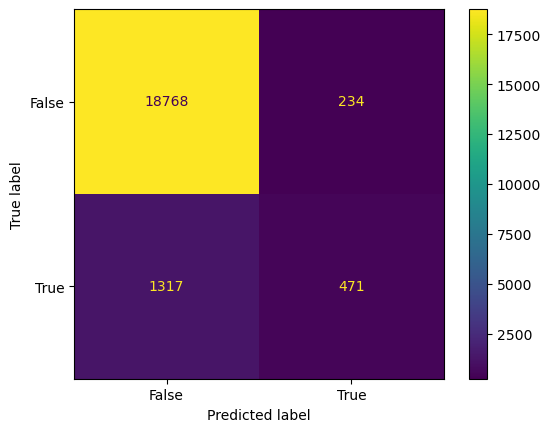

In [105]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)
## Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()  


In [106]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))

Accuracy:- 0.9253968253968254
Sensitivity:- 0.2634228187919463
Specificity:- 0.9876855067887591
Recall:- 0.2634228187919463
AUC:    	 0.9


In [107]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

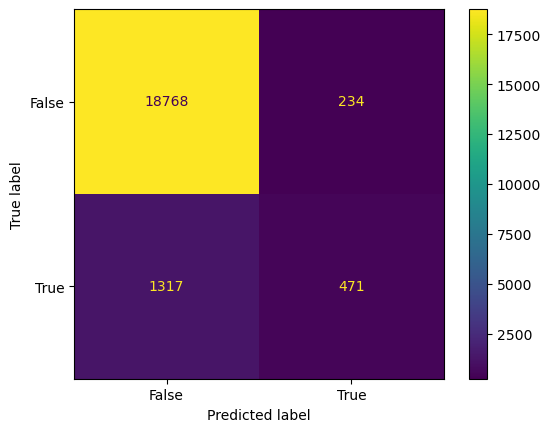

In [108]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [109]:
# Accuracy
print("Accuracy:-    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall:-    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.93
Sensitivity:-  	 0.26
Specificity:-  	 0.99
Recall:-    	 0.26
AUC:-    	 0.89


# 2. Decision tree with PCA

In [110]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
##Hyperparameter tuning

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [111]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.240134,0.020832,0.003125,0.006250,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.154062,0.190476,0.206704,0.268156,0.284916,0.220863,0.048838,3
1,1.242862,0.019408,0.006256,0.007662,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.154062,0.190476,0.206704,0.268156,0.284916,0.220863,0.048838,3
2,1.231967,0.026798,0.002305,0.004610,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.179272,0.156863,0.162011,0.279330,0.187151,0.192925,0.044591,7
3,1.242274,0.018444,0.000726,0.001451,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.179272,0.156863,0.162011,0.279330,0.187151,0.192925,0.044591,7
4,2.083902,0.016710,0.001505,0.003011,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.254902,0.246499,0.237430,0.229050,0.287709,0.251118,0.020243,1
5,2.110973,0.055651,0.007641,0.006596,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.254902,0.246499,0.237430,0.229050,0.287709,0.251118,0.020243,1
6,1.976672,0.060182,0.010086,0.006886,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.235294,0.226891,0.173184,0.287709,0.170391,0.218694,0.043612,5
7,1.904944,0.016330,0.004238,0.006088,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.235294,0.226891,0.173184,0.287709,0.170391,0.218694,0.043612,5


In [113]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.25111810087163355
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [114]:
##Model with optimal hyperparameters

# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

In [115]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[18632,   370],
       [ 1126,   662]], dtype=int64)

In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.93
Sensitivity:- 0.37
Specificity:- 0.98
Recall:- 0.37
Area under curve is: 0.68


In [118]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)


In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7937  206]
 [ 559  208]]


In [120]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:- 0.91
Sensitivity:- 0.37
Specificity:- 0.98
Recall:- 0.37
Area under curve is: 0.62


# RANDOM FOREST MODELLING

In [121]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [123]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [124]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [127]:
# Checking the report of our default model
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8143
           1       0.64      0.12      0.20       767

    accuracy                           0.92      8910
   macro avg       0.78      0.55      0.58      8910
weighted avg       0.90      0.92      0.89      8910



In [128]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[8093,   50],
       [ 678,   89]], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.918294051627385


In [131]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9188552188552188
{'max_depth': 17}


In [132]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.054186,0.025149,0.056422,0.007624,2,{'max_depth': 2},0.813131,0.812891,0.810486,0.805916,...,0.809668,0.003200,4,0.817340,0.812470,0.811869,0.809464,0.812229,0.812674,0.002568
1,14.041124,0.110192,0.079388,0.002426,7,{'max_depth': 7},0.879750,0.882636,0.880712,0.879028,...,0.880183,0.001397,3,0.903078,0.904101,0.903800,0.901575,0.905002,0.903511,0.001148
2,18.954589,0.171779,0.098657,0.007362,12,{'max_depth': 12},0.915584,0.913901,0.912458,0.911015,...,0.913179,0.001521,2,0.967653,0.968555,0.968915,0.966450,0.966570,0.967629,0.001002
3,19.712730,0.353423,0.104063,0.006882,17,{'max_depth': 17},0.917749,0.919192,0.918711,0.916065,...,0.918855,0.002138,1,0.985450,0.985269,0.986051,0.984488,0.984909,0.985233,0.000525


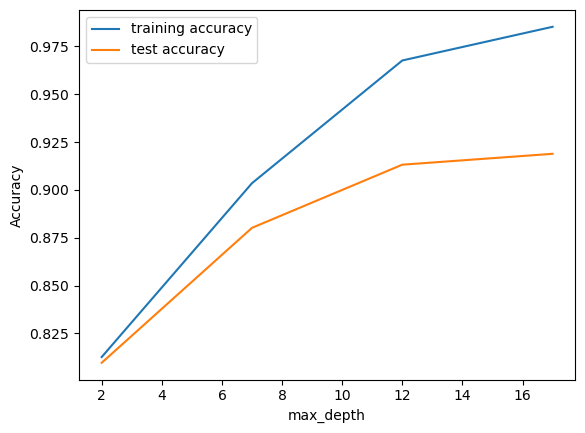

In [133]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 We see that as we increase the value of max_depth, both train and test scores increase till a point. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

In [134]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.838095238095238
{'n_estimators': 100}


In [135]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.271656,0.030059,0.090304,0.014940,100,{'n_estimators': 100},0.837662,0.845599,0.840789,0.835017,...,0.838095,0.004856,1,0.843254,0.844517,0.844456,0.840789,0.843795,0.843362,0.001368
1,52.178504,0.062406,0.351660,0.013379,600,{'n_estimators': 600},0.836941,0.842232,0.841751,0.833814,...,0.837470,0.003956,3,0.845358,0.842112,0.844396,0.839586,0.843555,0.843001,0.002013
2,93.805230,0.140960,0.658361,0.009890,1100,{'n_estimators': 1100},0.837662,0.843915,0.840067,0.835257,...,0.837614,0.004309,2,0.845960,0.842112,0.845839,0.840789,0.843314,0.843603,0.002039


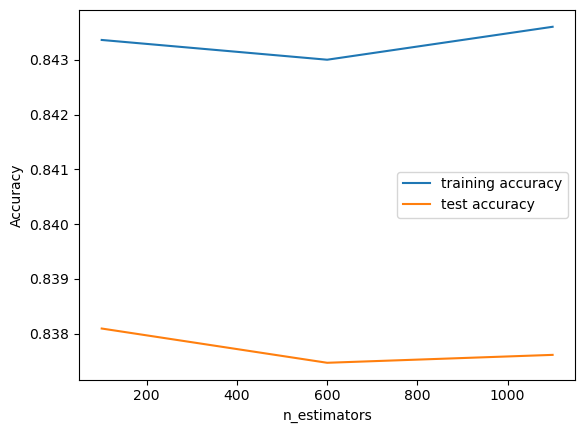

In [136]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [137]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8383838383838385
{'max_features': 4}


In [138]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.051310,0.096191,0.062027,0.000972,4,{'max_features': 4},0.831169,0.845118,0.844396,0.838865,...,0.838384,0.005830,1,0.842713,0.847884,0.852994,0.843434,0.845238,0.846453,0.003726
1,9.490016,0.339723,0.067978,0.006690,8,{'max_features': 8},0.837662,0.845599,0.840789,0.835017,...,0.838095,0.004856,2,0.843254,0.844517,0.844456,0.840789,0.843795,0.843362,0.001368
2,16.024630,0.232194,0.065419,0.006061,14,{'max_features': 14},0.832852,0.835979,0.832852,0.833814,...,0.832035,0.003853,3,0.839947,0.832431,0.839646,0.835618,0.839165,0.837362,0.002916
3,21.136665,0.190325,0.062154,0.003097,20,{'max_features': 20},0.829485,0.835738,0.832852,0.833093,...,0.830736,0.004567,4,0.837241,0.832492,0.838504,0.835798,0.836760,0.836159,0.002030
4,24.575049,0.243471,0.068605,0.008241,24,{'max_features': 24},0.829485,0.833333,0.827802,0.832612,...,0.829774,0.002892,5,0.835798,0.831770,0.836400,0.833153,0.835257,0.834476,0.001740


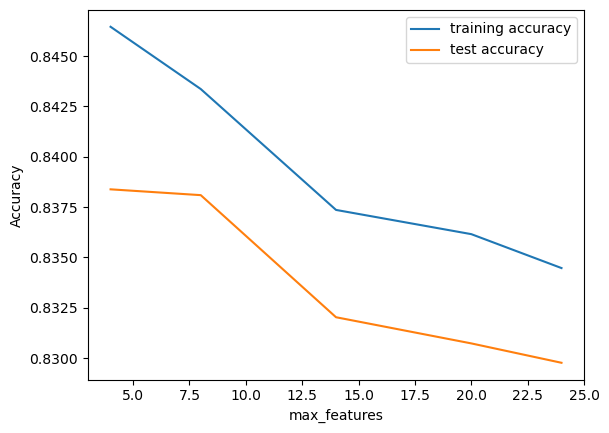

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8603174603174603
{'min_samples_leaf': 100}


In [140]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

In [141]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.885040,0.460415,0.103643,0.018754,100,{'min_samples_leaf': 100},0.858586,0.862434,0.862674,0.866041,...,0.860317,0.004847,1,0.873737,0.874098,0.875301,0.873437,0.875361,0.874387,0.000799
1,14.236381,0.335999,0.102320,0.017142,150,{'min_samples_leaf': 150},0.849447,0.853295,0.855219,0.850890,...,0.851419,0.002538,2,0.861772,0.861412,0.861712,0.858345,0.861772,0.861003,0.001335
2,13.163587,0.405028,0.086894,0.006957,200,{'min_samples_leaf': 200},0.841751,0.849206,0.845599,0.844396,...,0.843001,0.005075,3,0.851671,0.852333,0.851371,0.851190,0.850589,0.851431,0.000573
3,11.799388,0.099321,0.075445,0.003914,250,{'min_samples_leaf': 250},0.837422,0.841991,0.841510,0.839827,...,0.838336,0.004034,4,0.846080,0.845539,0.846380,0.845659,0.846380,0.846008,0.000353
4,11.133432,0.038900,0.071896,0.007610,300,{'min_samples_leaf': 300},0.833814,0.837662,0.834776,0.832131,...,0.832083,0.005338,5,0.841450,0.838444,0.838023,0.836821,0.836700,0.838288,0.001719


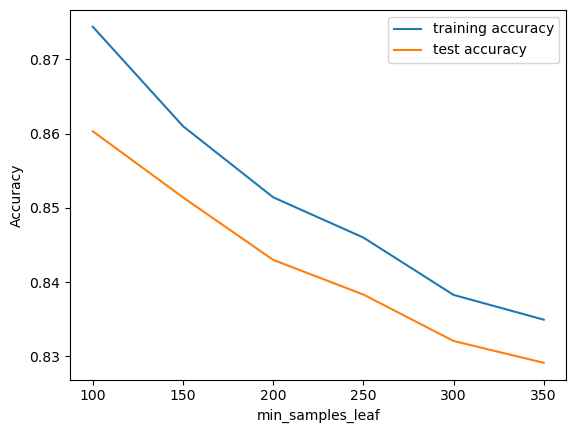

In [142]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [143]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8805194805194805
{'min_samples_split': 200}


In [144]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.378577,0.301127,0.104442,0.008321,200,{'min_samples_split': 200},0.882876,0.881433,0.882155,0.882636,...,0.880519,0.003546,1,0.901756,0.900493,0.902778,0.902417,0.903499,0.902189,0.001018
1,18.057381,0.568772,0.097660,0.006103,250,{'min_samples_split': 250},0.870370,0.877345,0.877104,0.878066,...,0.873882,0.004613,2,0.889971,0.891354,0.892977,0.892797,0.894180,0.892256,0.001452
2,18.152889,0.656459,0.109177,0.036134,300,{'min_samples_split': 300},0.866041,0.866282,0.866763,0.871332,...,0.866474,0.002978,3,0.879990,0.882516,0.882215,0.884560,0.886243,0.883105,0.002136
3,16.633952,0.556275,0.091294,0.006385,350,{'min_samples_split': 350},0.857383,0.864358,0.863877,0.868927,...,0.862386,0.004449,4,0.874459,0.876082,0.879269,0.877826,0.876082,0.876744,0.001652
4,15.854045,0.176712,0.078507,0.000656,400,{'min_samples_split': 400},0.853295,0.859307,0.860029,0.863636,...,0.857239,0.004940,5,0.869108,0.871513,0.872054,0.870370,0.871934,0.870996,0.001116


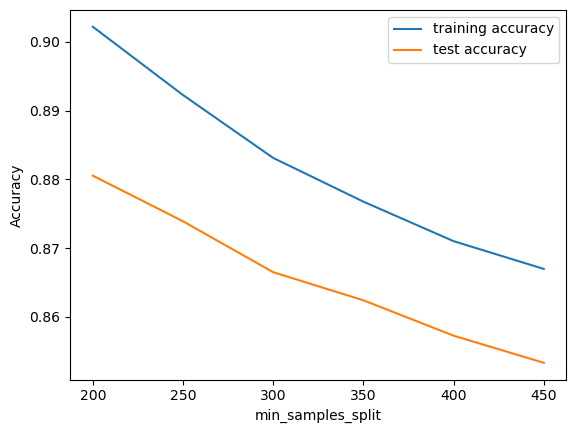

In [145]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [146]:
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fitting the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [148]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.913997113997114 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [ ]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

In [ ]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [ ]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [ ]:
rfc.oob_score_

In [ ]:
#create confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, predictions),2))

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2

# Conclusion and STRATEGY ahead

1) From the exploratory data analysis we have seen that there is considerable decrease in call and data usage, recharge during the action phase which is the 8th month.
2)  The following are identified as important features loc_og_t2m_mou_7
total_og_mou_6
loc_og_t_7
roam_ic_mou_7
onnet_mou_7
loc_og_t2c_mou_7
onnet_mou_8
roam_og_mou_8
arpu_7
3) A sudden drop in average revenue  per user in the 7th month plays a vital role in deciding the churn.
4) Outgoing ,roaming and total minutes of outgoing are all important factors  affecting the churn.
  
    
    The following startegies can be used to avoid churning
    1)  Imporve the customer experience by giving proper network connection to the customers who you see decrease in usage of outgoing in the 7th month.
    2)  Directly call the customer and ask for the feedback , if they still decide to leave try to ask for a chance and provide some offers. 
    3)  If they are leaving because of specific recharge plan provided by the another network provider, provide them a customised plan according to their convenience.